In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from matplotlib import*

from sklearn.decomposition import PCA 

In [50]:
data = pd.read_csv('gene_data-.csv')
meta = pd.read_csv('Meta-data-sheet.csv')

In [51]:
meta.head()

,sIdx,Time,Unit
0,S1,9,Hours
1,S2,9,Hours
2,S3,9,Hours
3,S4,7,Hours
4,S5,7,Hours


In [3]:
data.head()

,Unnamed: 0,symbol,S1,S2,S3,S4,S5,S6,S7,S8,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,1,Zzz3,253.401685,402.8508776,230.957463,688.486264,358.067836,344.962350,441.155001,301.149694,...,507.882774,465.081486,415.478767,297.061149,488.848114,367.912141,307.199908,347.802509,411.227261,283.709694
1,2,Zzef1,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
2,3,Zyx,40.578958,49.23516006,59.472005,46.212152,61.969671,55.732843,53.819870,54.315691,...,33.512262,36.751853,36.952457,35.718610,27.346198,32.647887,42.006833,32.324596,41.426033,32.754971
3,4,Zyg11b,26.373102,35.00190057,32.389728,34.932372,35.192365,33.858459,27.948378,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
4,5,Zyg11a,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797


In [4]:
len(data['symbol'].unique())

22329

In [5]:
len(data)

22411

In [6]:
dta_ch = data.iloc[:,2:]

In [7]:
dta_ch=dta_ch.replace({'ssssss': '39.0', 'hhhh' : '321.43'}, regex=True)

In [8]:
dta_ch.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,253.401685,402.8508776,230.957463,688.486264,358.067836,344.962350,441.155001,301.149694,390.361685,431.707182,...,507.882774,465.081486,415.478767,297.061149,488.848114,367.912141,307.199908,347.802509,411.227261,283.709694
1,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
2,40.578958,49.23516006,59.472005,46.212152,61.969671,55.732843,53.819870,54.315691,73.016585,51.144296,...,33.512262,36.751853,36.952457,35.718610,27.346198,32.647887,42.006833,32.324596,41.426033,32.754971
3,26.373102,35.00190057,32.389728,34.932372,35.192365,33.858459,27.948378,21.152797,32.283053,30.057553,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
4,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797


In [31]:
X=dta_ch.values
X=X.astype(float)

In [32]:
X[np.isnan(X)] = np.median(X[~np.isnan(X)])

In [33]:
X.shape

(22411, 30)

In [34]:
X = X.T
X.shape

(30, 22411)

In [35]:
X_std = StandardScaler().fit_transform(X)

In [36]:
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

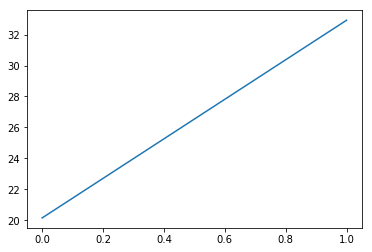

In [37]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()

In [38]:
y = pca.components_

In [39]:
y.shape

(2, 22411)

In [40]:
z = pca.explained_variance_

In [41]:
a = 0.0
for i in range(len(z)):
    a = a+ float(z[i])
print a

5141.70261892


In [42]:
xn = pca.fit_transform(X)

In [43]:
xn.shape

(30, 2)

In [52]:
target = np.array(meta['Time'])

In [61]:
x_min, x_max = xn[:, 0].min() - 10000, xn[:, 0].max() + 10000
y_min, y_max = xn[:, 1].min() - 10000, xn[:, 1].max() + 10000

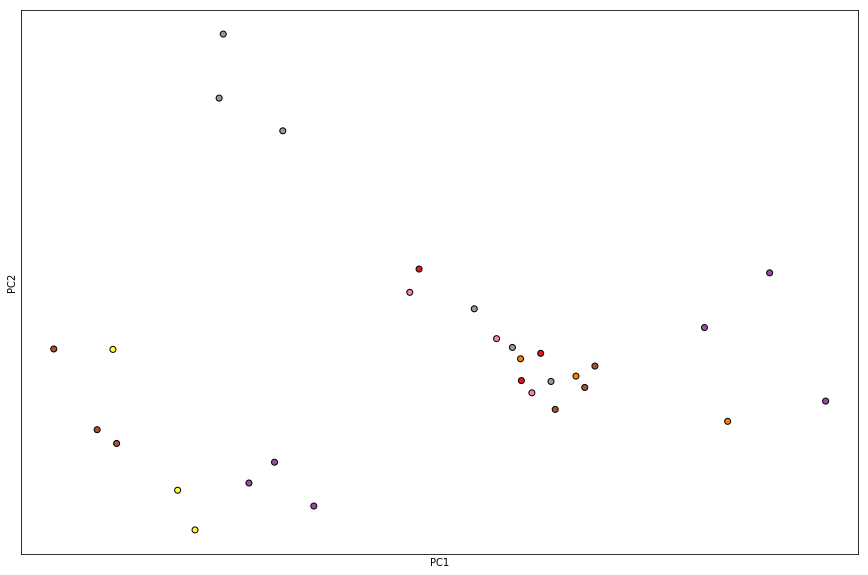

In [62]:
plt.figure(figsize= (15,10))

plt.scatter(xn[:, 0], xn[:, 1], c=target, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

In [69]:
import seaborn as sns

In [70]:
xx = list(xn[:, 0])
yy = list(xn[:, 1])

In [72]:
d = {'PC1':xx , 'PC2': yy,'Target': target }
df = pd.DataFrame(data=d)
df.head()

,PC1,PC2,Target
0,-112801.229806,3096.105410,9
1,-99478.859519,-30691.072652,9
2,-93499.844801,-36451.523104,9
3,-94632.244864,2917.211251,7
4,-69413.358331,-72623.405429,7


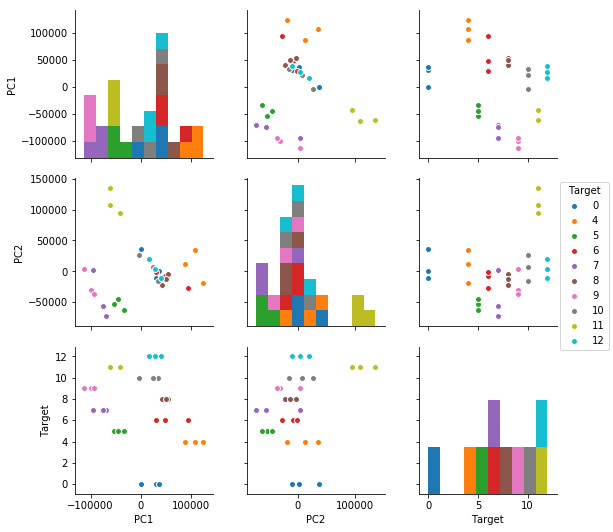

In [75]:
sns.pairplot(df, hue="Target")
plt.show()